In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm


In [39]:
def compute_fint_score(penalties, rewards, reward_multiplier, penalty_multiplier):

    results = []
    for reward, penalty in zip(rewards, penalties):

        # now compute the FINTscore by applying the reward/penalty correction terms.
        # this follows FINT_{score} = INT_{score} * (REWARD*N_{backbone}) * PENALTY^{N_{mutable}},
        # where PENALTY <= 1.0 <= REWARD.
        score = 0.75 * reward * reward_multiplier * penalty_multiplier ** penalty
        if score > 1.0:
            results.append(1.0)
        else:
            results.append(score)
    return results
    
    

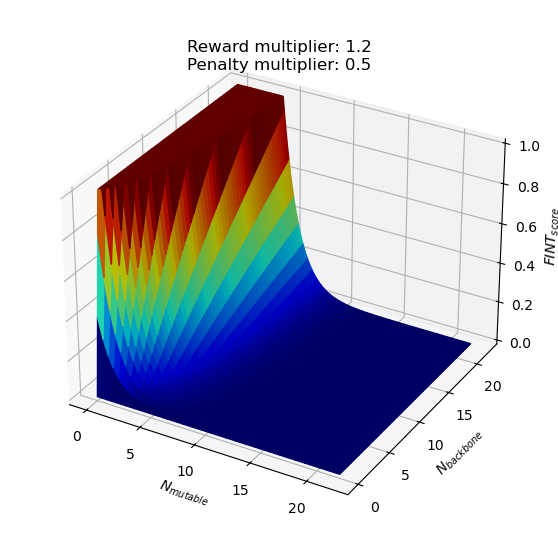

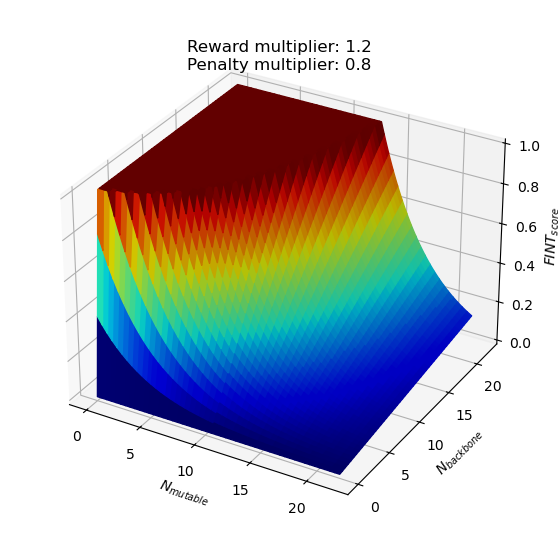

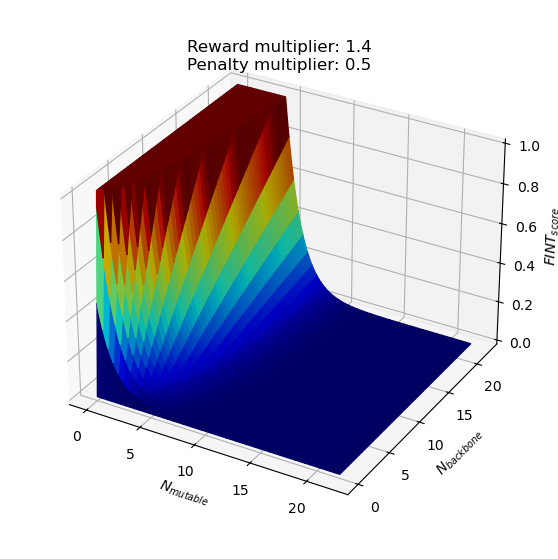

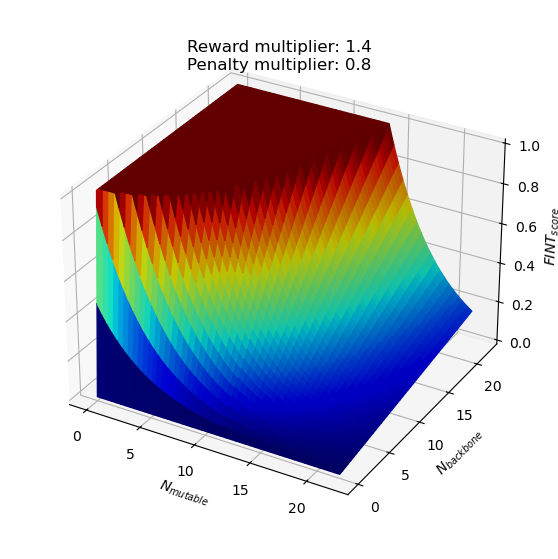

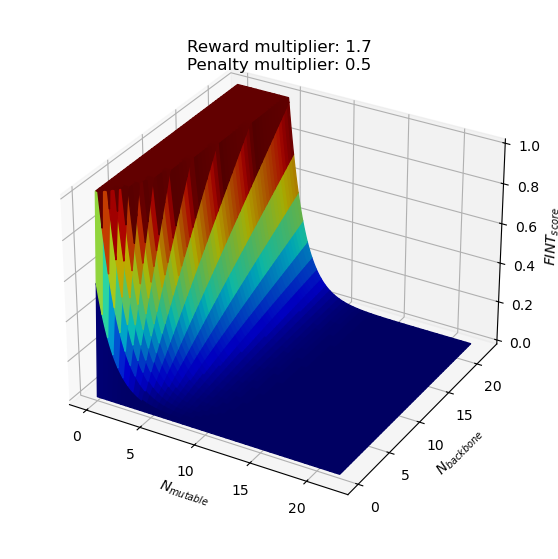

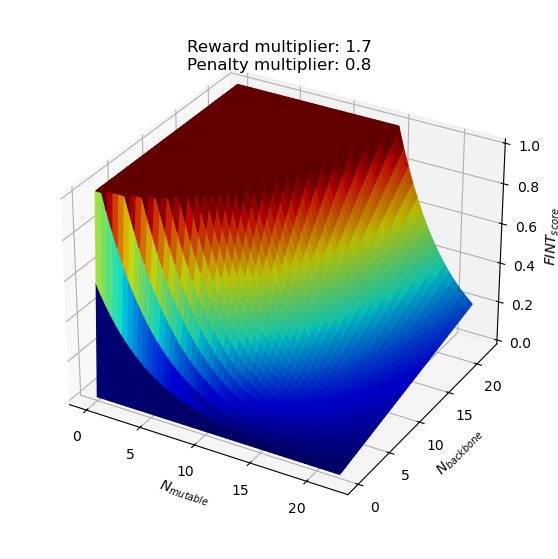

In [46]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D  
# Axes3D import has side effects, it enables using projection='3d' in add_subplot

for reward_multiplier, penalty_multiplier in zip(
        [1.2, 1.2, 1.4, 1.4, 1.7, 1.7],
        [0.5, 0.8, 0.5, 0.8, 0.5, 0.8]
):
    
    
    fig = plt.figure(figsize=(7,7))
    ax = fig.add_subplot(111, projection='3d')
    x = y = np.arange(0.0, 22, 0.01)
    X, Y = np.meshgrid(x, y)
    zs = np.array(compute_fint_score(np.ravel(X), np.ravel(Y), reward_multiplier, penalty_multiplier))
    Z = zs.reshape(X.shape)
    
    my_col = cm.jet(Z/np.amax(Z))
    
    ax.plot_surface(X, Y, Z, facecolors = my_col)
    
    ax.set_xlabel(r'$N_{mutable}$')
    ax.set_ylabel(r'$N_{backbone}$')
    ax.set_zlabel(r'$FINT_{score}$')
    ax.set_box_aspect(aspect=None, zoom=0.92)
    ax.set_title(f"Reward multiplier: {reward_multiplier}\n"
     + f"Penalty multiplier: {penalty_multiplier}", y=0.95)
    plt.show()